In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [27]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There is no missing values

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [36]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df['Exited'].value_counts(normalize=True)* 100

0    79.63
1    20.37
Name: Exited, dtype: float64

In [6]:
pd.crosstab( df.Gender, df.Exited, normalize = "index" )

Exited,0,1
Gender,,
Female,0.749285,0.250715
Male,0.835441,0.164559


In [7]:
df.groupby( ['Geography','Gender' ])['Age'].mean()

Geography  Gender
France     Female    38.773994
           Male      38.296404
Germany    Female    40.154233
           Male      39.424772
Spain      Female    39.199265
           Male      38.649135
Name: Age, dtype: float64

# Exploratory Data Analysis

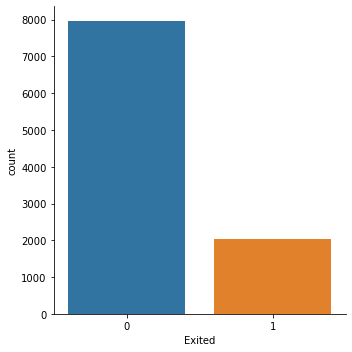

In [21]:
sns.catplot(x='Exited',data=df,kind='count')

C:\Users\raman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

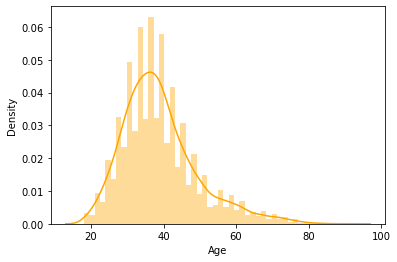

In [16]:
sns.distplot(df['Age'],color='orange')



Age data is left skewed

C:\Users\raman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

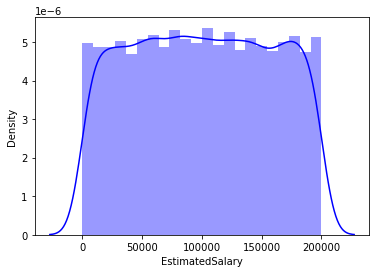

In [20]:
sns.distplot(df['EstimatedSalary'],color='blue')

Estimated Salary is uniformly Distributed

C:\Users\raman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Balance', ylabel='Density'>

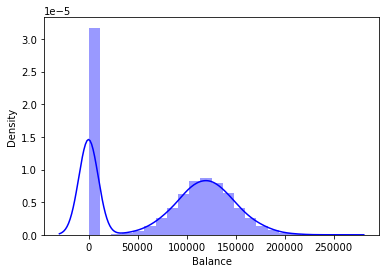

In [18]:
sns.distplot(df['Balance'],color='blue')

Balance data have normal Distribution

C:\Users\raman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

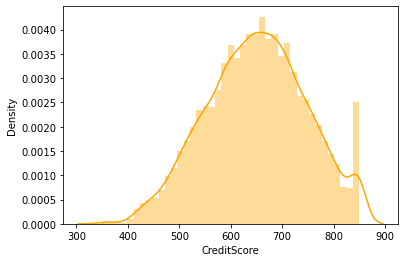

In [22]:
sns.distplot(df['CreditScore'],color='orange')

Credit Score have normal distribution

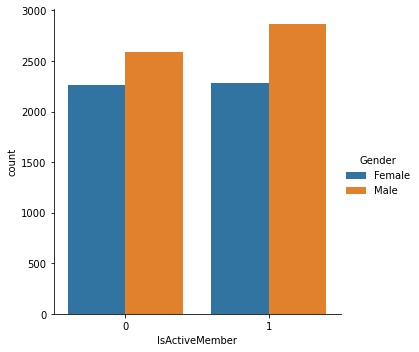

In [8]:
sns.catplot(x='IsActiveMember' ,hue="Gender" ,kind="count",data=df)

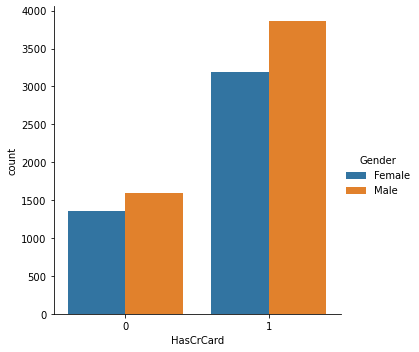

In [9]:
sns.catplot(x='HasCrCard' ,hue="Gender" ,kind="count" ,data=df)

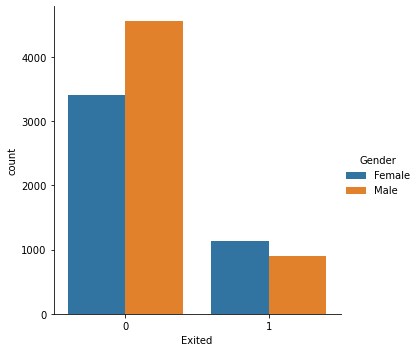

In [10]:
sns.catplot(x='Exited' ,hue="Gender" ,kind="count" ,data=df)

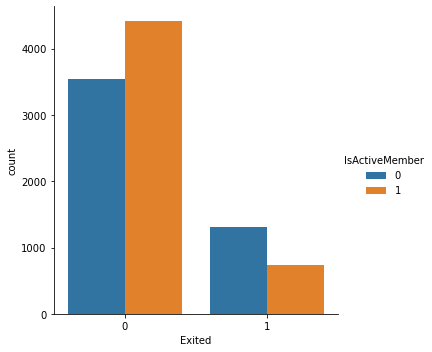

In [11]:
sns.catplot(x='Exited' ,hue="IsActiveMember" ,kind="count" ,data=df)

<AxesSubplot:>

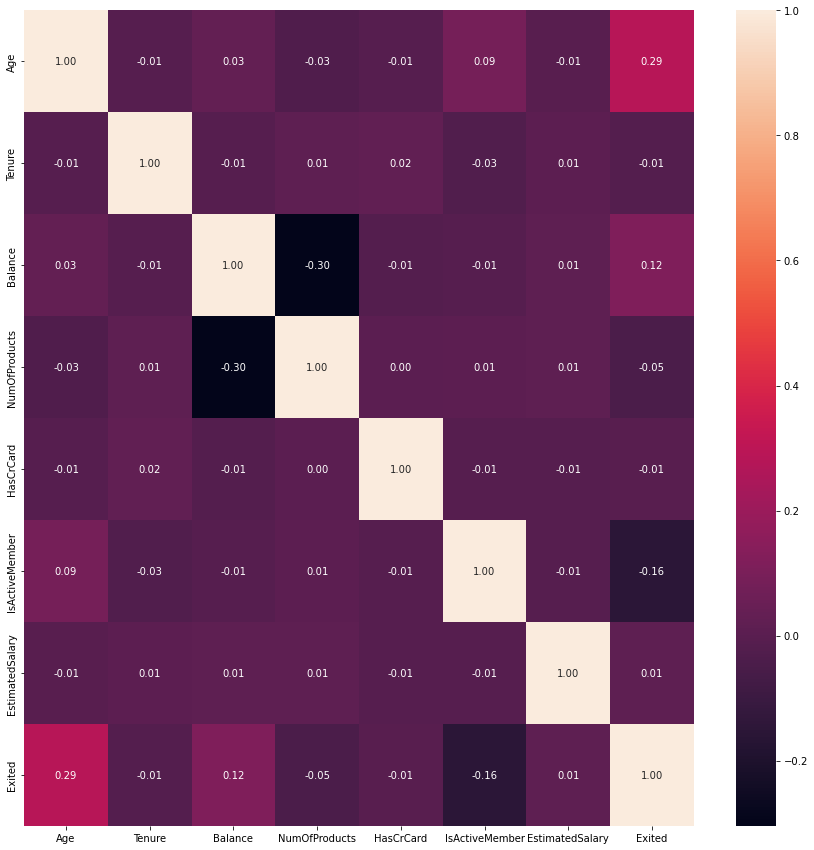

In [42]:
plt.figure(figsize=(15,15))
sns.heatmap(df[['Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']].corr(),annot=True,fmt='.2f',cbar=True)

C:\Users\raman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\raman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\raman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\raman\anaconda3\lib\si

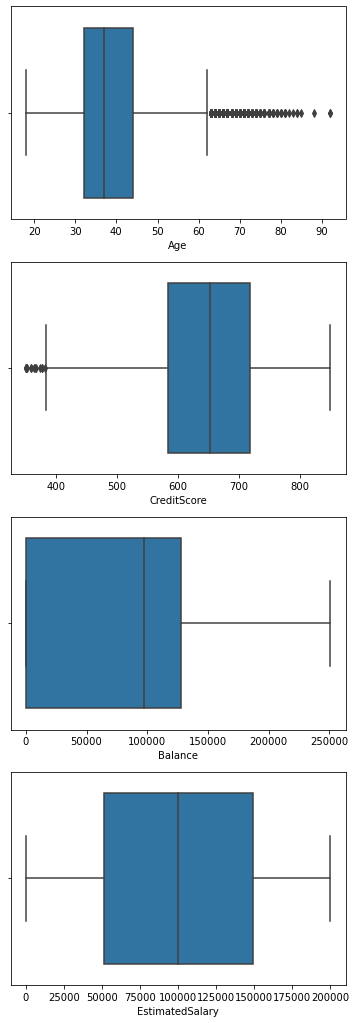

In [31]:
fig,axs = plt.subplots(4,figsize=(6,18))
X =df[['Age','CreditScore','Balance','EstimatedSalary']]
for i,column in enumerate(X) :
    sns.boxplot(df[column],ax=axs[i])

In [32]:
# Removing the outliers for Age 

q1_age =df['Age'].quantile(0.25)
q3_age=df['Age'].quantile(0.75)
iqr_age=q3_age-q1_age
lower=q1_age-(1.5 * iqr_age)
upper=q3_age+(1.5 * iqr_age)
df=df[df['Age']>lower]
df=df[df['Age']<upper]

In [33]:
# Removing the outliers for credit score

q1_credit=df['CreditScore'].quantile(0.25)
q3_credit=df['CreditScore'].quantile(0.75)
iqr_credit=q3_credit-q1_credit
lower=q1_credit-(1.5 * iqr_credit)
upper=q3_credit+(1.5 * iqr_credit)
df=df[df['CreditScore']>lower]
df=df[df['CreditScore']<upper]

# Network Building

In [3]:

X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [4]:
#create dummy variable
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [5]:
# concatenate the data frames
X = pd.concat([X,geography,gender],axis=1)

In [6]:
# drop unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [7]:
# splitting the dataset into traing and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [9]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [10]:
# importing libraries
import keras
from keras.models import Sequential
from keras.layers import Dense
#from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [11]:
#initialising the ANN
classifier = Sequential()

In [12]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))


In [13]:
##Adding the second layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))



In [14]:
# adding th eoutput layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform',activation='sigmoid'))


In [15]:

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [16]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs=100)


Epoch 1/100
536/536 [==============================] - 8s 8ms/step - loss: 0.5828 - accuracy: 0.7186 - val_loss: 0.5098 - val_accuracy: 0.7887
Epoch 2/100
536/536 [==============================] - 4s 7ms/step - loss: 0.4937 - accuracy: 0.7962 - val_loss: 0.4888 - val_accuracy: 0.7910
Epoch 3/100
536/536 [==============================] - 4s 7ms/step - loss: 0.4758 - accuracy: 0.7964 - val_loss: 0.4755 - val_accuracy: 0.7906
Epoch 4/100
536/536 [==============================] - 4s 7ms/step - loss: 0.4631 - accuracy: 0.7962 - val_loss: 0.4648 - val_accuracy: 0.7914
Epoch 5/100
536/536 [==============================] - 4s 7ms/step - loss: 0.4530 - accuracy: 0.7975 - val_loss: 0.4566 - val_accuracy: 0.7917
Epoch 6/100
536/536 [==============================] - 4s 7ms/step - loss: 0.4445 - accuracy: 0.8024 - val_loss: 0.4500 - val_accuracy: 0.7974
Epoch 7/100
536/536 [==============================] - 4s 7ms/step - loss: 0.4372 - accuracy: 0.8050 - val_loss: 0.4455 - val_accuracy: 0.7989

In [18]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 0)

score, acc = classifier.evaluate(X_train, y_train,batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

800/800 [==============================] - 3s 4ms/step - loss: 0.3311 - accuracy: 0.8648
Train score: 0.3310734033584595
Train accuracy: 0.8647500276565552


In [19]:
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

63/63 [==============================] - 1s 3ms/step
********************
200/200 [==============================] - 1s 4ms/step - loss: 0.3384 - accuracy: 0.8595
Test score: 0.33838707208633423
Test accuracy: 0.859499990940094


In [20]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1541,   66],
       [ 215,  178]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

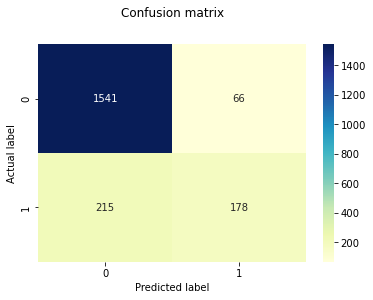

In [23]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.45      0.56       393

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

